In [ ]:
import datetime as dt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

from datetime import datetime, timedelta

import os
import gc
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime
import datetime
from tqdm import tqdm
from matplotlib.patches import Rectangle
import warnings

import seaborn as sns

from sklearn import svm
from sklearn.datasets import  make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.cluster import KMeans
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples

from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from numpy import percentile
from sklearn.metrics import f1_score

warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/k8s/datasets/nabout.csv")

df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)
df

,cpu_usage,net_usage,disk_usage,anomaly
timestamp,,,,
2014-02-14 14:30:00,0.132,236906.0,43216100.0,False
2014-02-14 14:35:00,0.134,247200.0,863964000.0,True
2014-02-14 14:40:00,0.134,244932.0,128310000.0,True
2014-02-14 14:45:00,0.134,249894.0,0.0,False
2014-02-14 14:50:00,0.134,226273.0,125814000.0,True
...,...,...,...,...
2014-03-13 14:04:00,0.066,219813.0,7878250.0,False
2014-03-13 14:09:00,0.068,207644.0,107195000.0,True
2014-03-13 14:14:00,0.134,204319.0,44328600.0,False


In [ ]:
for column in df.columns:
    fig = px.line(df, x=df.index, y=[column], title='AWS ' + column, template = 'plotly_dark')
    fig.show()

# K-means PyOD

## Elbow Curve


In [ ]:
n_cls = range(1, 20)

kmeans = [KMeans(n_clusters=i).fit(df) for i in n_cls]
scores = [kmeans[i].score(df) for i in range(len(kmeans))]

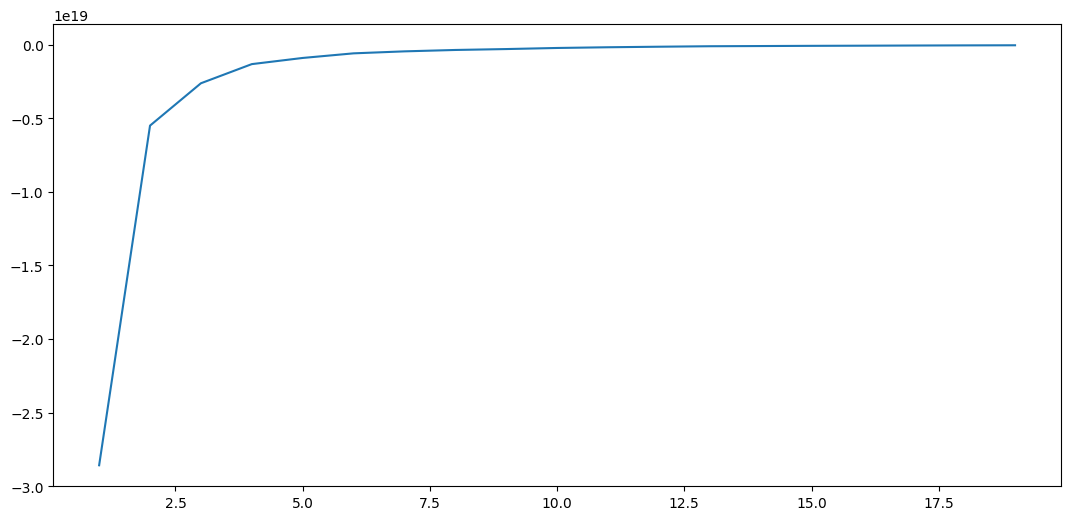

In [ ]:
fig, ax = plt.subplots(figsize=(13,6))
ax.plot(n_cls, scores)
plt.show()

## k-means

In [ ]:
dataframe = df.copy()
dataframe.head()

,cpu_usage,net_usage,disk_usage,anomaly
timestamp,,,,
2014-02-14 14:30:00,0.132,236906.0,43216100.0,False
2014-02-14 14:35:00,0.134,247200.0,863964000.0,True
2014-02-14 14:40:00,0.134,244932.0,128310000.0,True
2014-02-14 14:45:00,0.134,249894.0,0.0,False
2014-02-14 14:50:00,0.134,226273.0,125814000.0,True


In [ ]:
classifiers = {
        'Kmeans':KMeans(n_clusters=4)
}

In [ ]:
column_usage = 'cpu_usage'
X = dataframe[[column_usage]]
#.values.reshape(-1,2)

In [ ]:
X

,cpu_usage
timestamp,
2014-02-14 14:30:00,0.132
2014-02-14 14:35:00,0.134
2014-02-14 14:40:00,0.134
2014-02-14 14:45:00,0.134
2014-02-14 14:50:00,0.134
...,...
2014-03-13 14:04:00,0.066
2014-03-13 14:09:00,0.068
2014-03-13 14:14:00,0.134


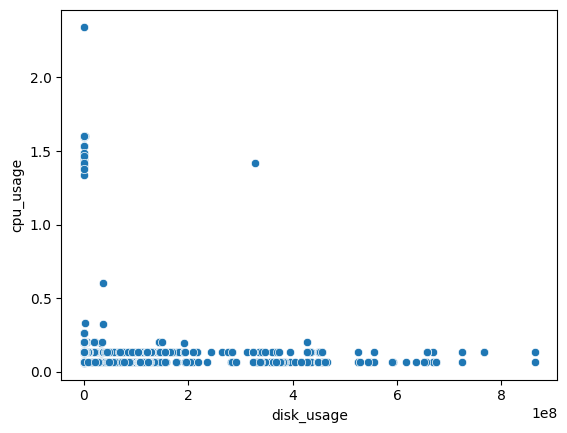

In [ ]:
sns.scatterplot(
        df,
        x='disk_usage',
        y='cpu_usage'
    )
plt.show()

In [ ]:
from scipy import stats

def getDistanceByPoint(data, model):
    distance = pd.Series()
    print(len(data))
    for i in range(0,len(data)):
        Xa = np.array(data.iloc[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.at[i]=np.linalg.norm(Xa-Xb)
    return distance

for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)


    cluster_pred = clf.predict(X)

    dfx = df.copy()


    dist = getDistanceByPoint(X, clf)
    print(dist)

    n_outliers = int(0.05*len(dist))

    threshold = percentile(dist, 95)
    is_outlier = (dist >= threshold) * 1

    n_inliers = len(cluster_pred) - n_outliers

    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)

7775
0       1.376571
1       1.374571
2       1.374571
3       1.374571
4       1.374571
          ...   
7770    0.139732
7771    0.137732
7772    1.374571
7773    0.137732
7774    0.137732
Length: 7775, dtype: float64
OUTLIERS :  388 INLIERS :  7387 Kmeans


In [ ]:
is_outlier_df = pd.DataFrame(is_outlier)
is_outlier_df.set_index(dfx.index)
dfx['outlier'] = is_outlier_df.iloc[:,0].values

dfx

,cpu_usage,net_usage,disk_usage,anomaly,outlier
timestamp,,,,,
2014-02-14 14:30:00,0.132,236906.0,43216100.0,False,1
2014-02-14 14:35:00,0.134,247200.0,863964000.0,True,0
2014-02-14 14:40:00,0.134,244932.0,128310000.0,True,0
2014-02-14 14:45:00,0.134,249894.0,0.0,False,0
2014-02-14 14:50:00,0.134,226273.0,125814000.0,True,0
...,...,...,...,...,...
2014-03-13 14:04:00,0.066,219813.0,7878250.0,False,0
2014-03-13 14:09:00,0.068,207644.0,107195000.0,True,0
2014-03-13 14:14:00,0.134,204319.0,44328600.0,False,0


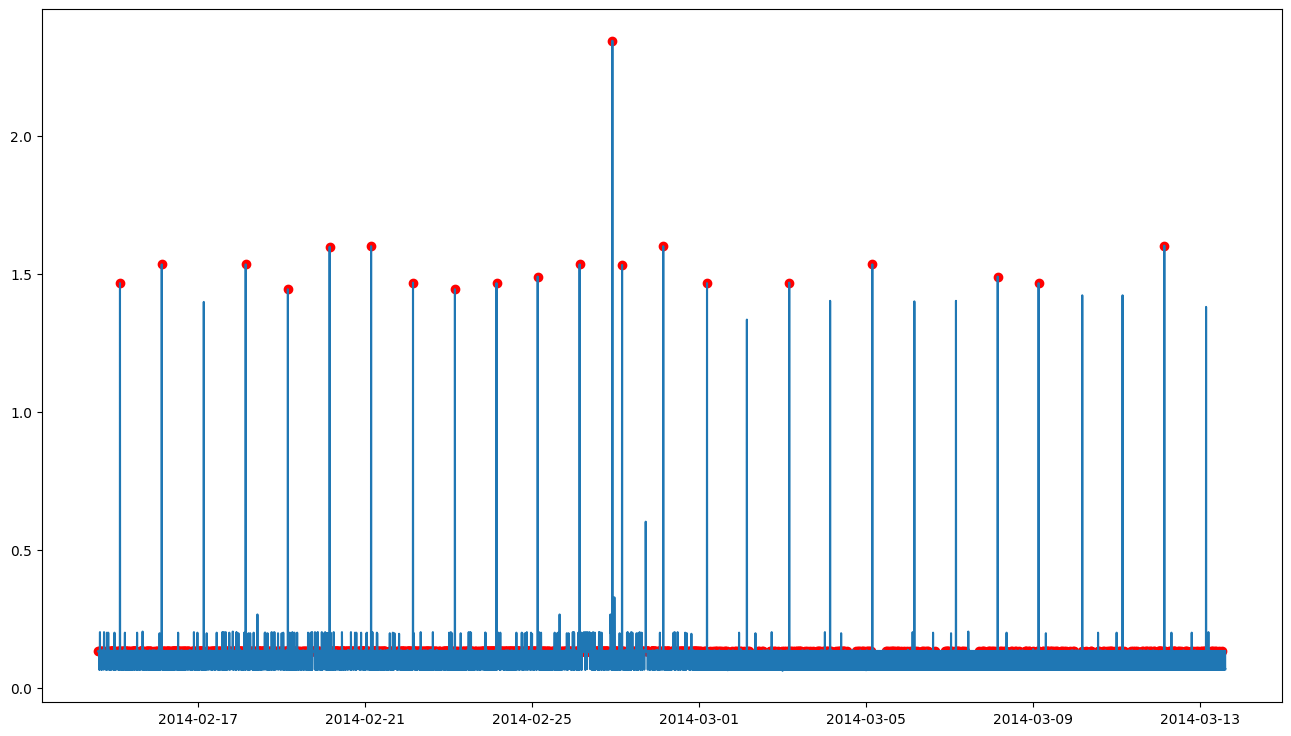

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
a = dfx.loc[dfx.outlier == 1, [column_usage]]

ax.plot(dfx.index, dfx[column_usage])
ax.scatter(a.index, a[column_usage], color='red')
plt.show()

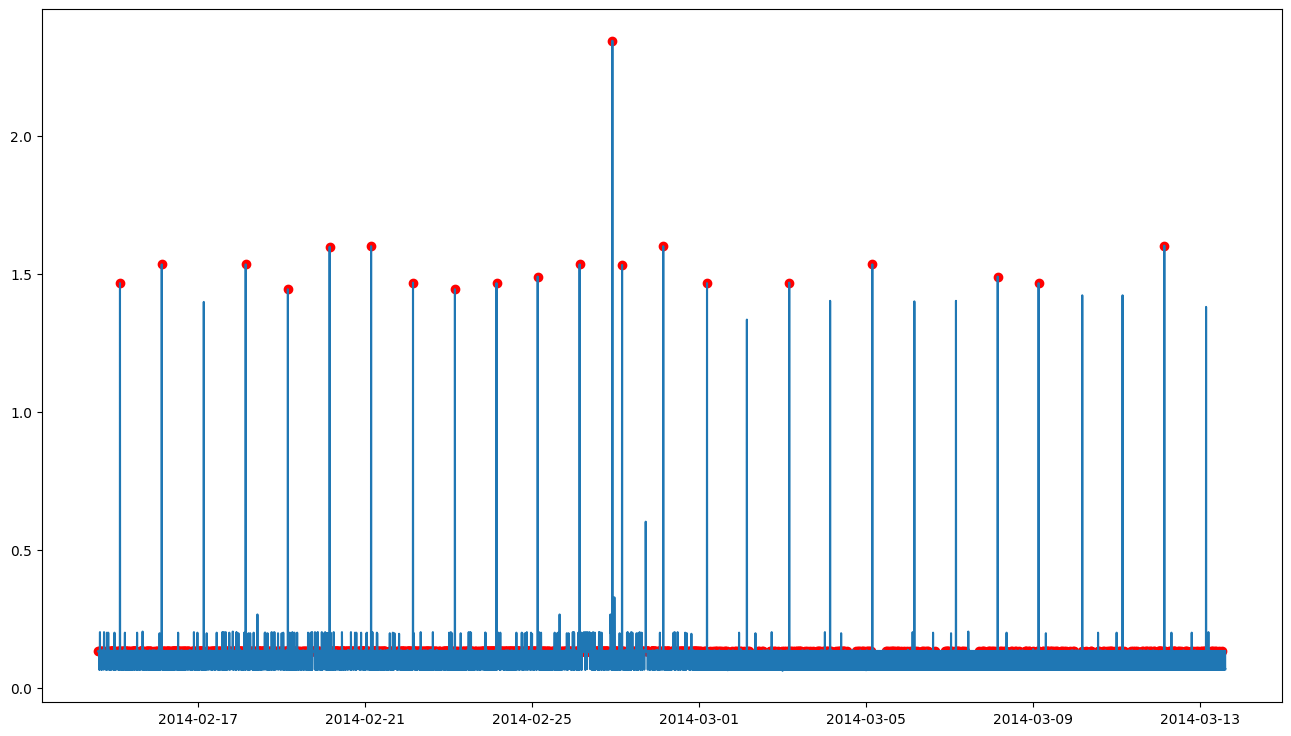

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
a = dfx.loc[dfx.outlier == 1, [column_usage]]

ax.plot(dfx.index, dfx[column_usage])
ax.scatter(a.index, a[column_usage], color='red')
plt.show()

In [ ]:
y_pred = dfx['outlier']
# Define colors for anomalies and non-anomalies
colors = ['green' if a == 1 else 'red' for a in y_pred]

# Create a scatter plot of the data with anomalies highlighted in red
fig = go.Figure(data=go.Scatter(x=dfx.index, y=dfx[column_usage],
                                 mode='markers', marker=dict(color=colors, size=3)))

# Set the title and axis labels for the plot
fig.update_layout(title=dict(text='Isolation Forest Anomaly prediction', x=0.5),
                  yaxis_title='Value',
                  xaxis_title='Timestamp')

# Show the plot
fig.show()

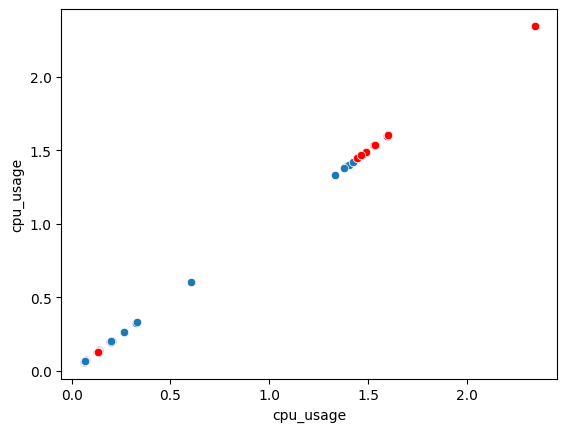

In [ ]:
sns.scatterplot(
        df,
        x=column_usage,
        y=column_usage
    )


sns.scatterplot(
        dfx.loc[dfx.outlier == 1],
        x=column_usage,
        y=column_usage,
        color='red'
    )
plt.show()

# Metrics


In [ ]:
y_pred = y_pred == 0
dfx['name'] = y_pred
y_pred

timestamp
2014-02-14 14:30:00    False
2014-02-14 14:35:00     True
2014-02-14 14:40:00     True
2014-02-14 14:45:00     True
2014-02-14 14:50:00     True
                       ...  
2014-03-13 14:04:00     True
2014-03-13 14:09:00     True
2014-03-13 14:14:00     True
2014-03-13 14:19:00     True
2014-03-13 14:24:00     True
Name: outlier, Length: 7775, dtype: bool

In [ ]:
p_values = {}
p_stats_ = {}
percent = {}
silhoutte = {}
calinski_harabasz = {}
davies_bouldin = {}

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

cols_in = [column_usage]

In [ ]:
dfx['name'].value_counts()

True     6600
False    1175
Name: name, dtype: int64

In [ ]:
#percent anomaly
dist = dfx['name'].value_counts(normalize=True)
print(dist)
percent['name'] = dist.loc[True]

True     0.848875
False    0.151125
Name: name, dtype: float64


In [ ]:
#silhouette conficient samples non-anomaly
labels = [1 if i == True else 2 for i in dfx['name']]
dfx['silhouette_zcore_'] = silhouette_samples(df[[column_usage]], labels)
silhoutte['name'] = dfx[dfx['name']]['silhouette_zcore_'].mean()

In [ ]:
#ks coeficient
normal = dfx.loc[dfx['name'] == False, [column_usage]]
anomaly = dfx.loc[dfx['name'] == True, [column_usage]]
for col_in in tqdm(cols_in):
  if len(normal)>0 and len(anomaly)>0:
    stats_, pvalue = stats.kstest(normal[col_in], anomaly[col_in])
    p_values[col_in+'_'] = pvalue
    p_stats_[col_in+'_'] = stats_

100%|██████████| 1/1 [00:00<00:00,  4.20it/s]


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(df[[column_usage]], labels)
calinski_harabasz['name'] = round(ch_index, 3)
print("Calinski-Harabasz Index:", round(ch_index, 3))

Calinski-Harabasz Index: 397.675


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(df[[column_usage]], labels)
davies_bouldin['name'] = round(dbi, 3)
print("Davies-Bouldin Index:", round(dbi, 3))

Davies-Bouldin Index: 1.485


pvalue
  svm_algorithm         pvalue
0    cpu_usage_  1.437612e-297
{'cpu_usage_': 1.4376116271553987e-297}


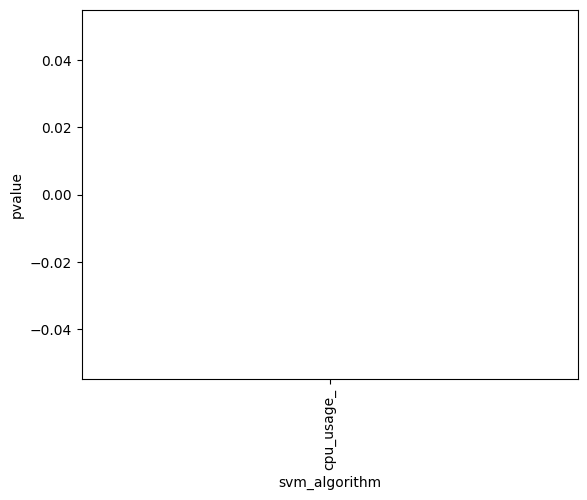

statistics
  svm_algorithm  statistics
0    cpu_usage_    0.565152
{'cpu_usage_': 0.5651515151515152}


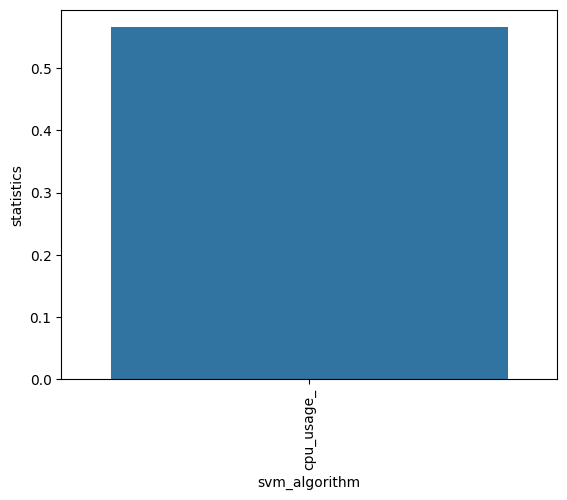

percent
  svm_algorithm   percent
0          name  0.848875
{'name': 0.8488745980707395}


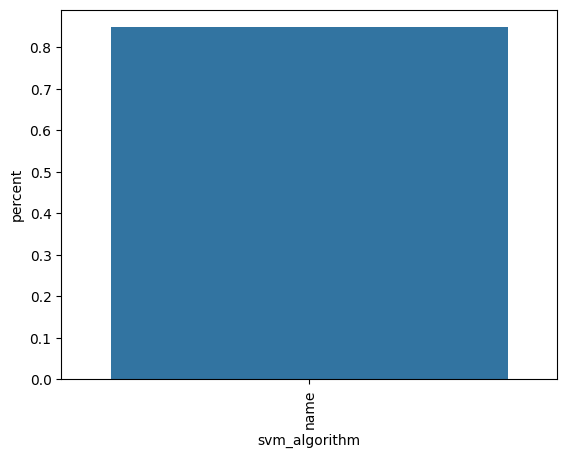

silhoutte
  svm_algorithm  silhoutte
0          name   0.201995
{'name': 0.20199547123581013}


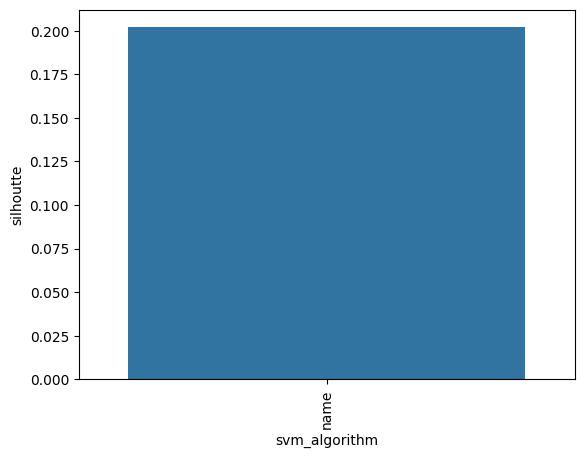

calinski_harabasz
  svm_algorithm  calinski_harabasz
0          name            397.675
{'name': 397.675}


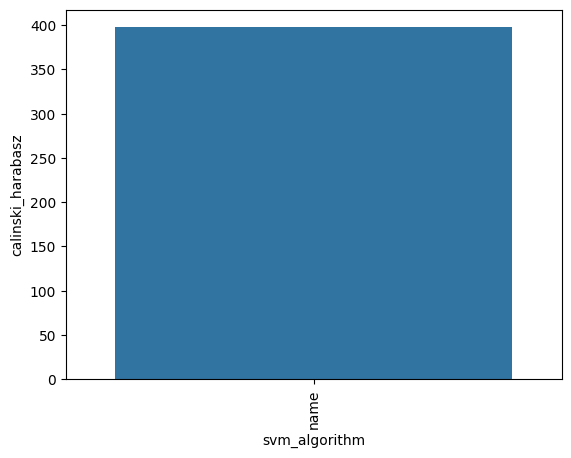

davies_bouldin
  svm_algorithm  davies_bouldin
0          name           1.485
{'name': 1.485}


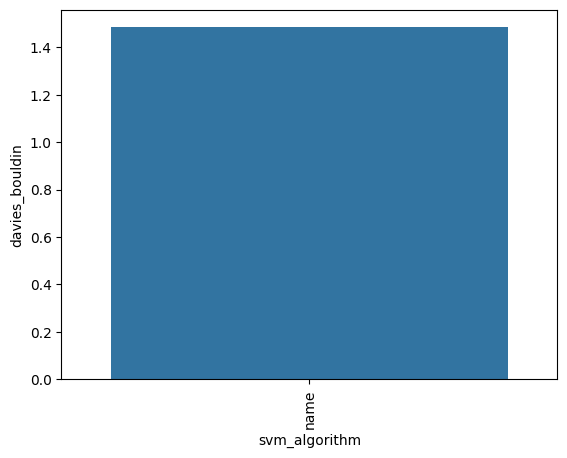

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name)
    df_values =  pd.DataFrame([dictionary])
    df_values = df_values.T
    df_values.reset_index(inplace=True)
    df_values.columns = ['svm_algorithm', name]
    print(df_values)
    print(dictionary)

    sns.barplot(data=df_values, x='svm_algorithm', y=name)
    plt.xticks(df_values.index, df_values['svm_algorithm'].values, rotation=90)
    plt.show()

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name + ': ' + str(np.array(list(dictionary.values())).mean()))

pvalue: 1.4376116271553987e-297
statistics: 0.5651515151515152
percent: 0.8488745980707395
silhoutte: 0.20199547123581013
calinski_harabasz: 397.675
davies_bouldin: 1.485


In [ ]:
svm_df = pd.DataFrame()
svm_df['anomaly']  = [1 if i==True else 0 for i in df.anomaly]

svm_f1 = f1_score(dfx['outlier'], svm_df['anomaly'])
print(f'One Class SVM F1 Score : {round(svm_f1 * 100,2)}%')

One Class SVM F1 Score : 8.01%
